In [1]:
# Quiz 1

import numpy as np

# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    station = ridership[0,:].argmax()
    overall_mean = ridership.mean() # Replace this with your code
    mean_for_max = ridership.mean(axis=0)[station] # Replace this with your code
    
    return (overall_mean, mean_for_max)

print mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)


In [2]:
# Quiz 2

def min_and_max_riders_per_day(ridership):
    '''
    Fill in this function. First, for each subway station, calculate the
    mean ridership per day. Then, out of all the subway stations, return the
    maximum and minimum of these values. That is, find the maximum
    mean-ridership-per-day and the minimum mean-ridership-per-day for any
    subway station.
    '''
    mean_ridership_station = ridership.mean(axis=0)
    max_daily_ridership = mean_ridership_station.max()     # Replace this with your code
    min_daily_ridership = mean_ridership_station.min()     # Replace this with your code
    
    return (max_daily_ridership, min_daily_ridership)

print min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)


In [3]:
import pandas as pd

# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

# Quiz 3

def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    '''
    station = ridership.iloc[0].argmax()
    overall_mean = ridership.values.mean() # Replace this with your code
    mean_for_max = ridership.mean()[station] # Replace this with your code
    
    return (overall_mean, mean_for_max)

print mean_riders_for_max_station(ridership_df)

(2342.5999999999999, 3239.9000000000001)


In [4]:
# Quiz 4

filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    standard_x = (x - x.mean())/x.std(ddof=0)
    standard_y = (y - y.mean())/y.std(ddof=0)
    x_y = standard_x*standard_y
    return x_y.mean()

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print correlation(entries, rain)
print correlation(entries, temp)
print correlation(rain, temp)

print correlation(entries, cum_entries)

0.0356485157722
-0.0266933483216
-0.229034323408
0.585895470766


In [5]:
# Quiz 5

# Cumulative entries and exits for one station for a few hours
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

    
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    new_df = entries_and_exits - entries_and_exits.shift(1)
    return new_df.dropna()

print get_hourly_entries_and_exits(entries_and_exits)

   ENTRIESn  EXITSn
1        23       8
2        18      18
3        71      54
4       170      44
5       214      42
6        87      11
7        10       3
8        36      89
9       153     333


In [6]:
# Quiz 6

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    def convert(grade):
        if grade in range(90,101):
            return "A"
        elif grade in range(80,90):
            return "B"
        elif grade in range(70,80):
            return "C"
        elif grade in range(60,70):
            return "D"
        else:
            return "F"
    
    return grades.applymap(convert)

print convert_grades(grades_df)

        exam1 exam2
Andre       F     F
Barry       B     D
Chris       C     F
Dan         C     F
Emilio      B     D
Fred        C     F
Greta       A     C
Humbert     D     F
Ivan        A     C
James       B     D


In [7]:
# Quiz 7

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    def standard(column):
        return (column - column.mean())/column.std(ddof=0)
    
    return df.apply(standard)

print standardize(grades_df)

            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  0.662400
Fred    -0.513779 -0.441600
Greta    0.887436  1.490400
Humbert -0.847401 -0.786600
Ivan     1.354508  1.007400
James    0.620538  0.179400


In [8]:
# Quiz 8

df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    def second(array):
        return array.sort_values(ascending=False)[1]
    return df.apply(second)

print second_largest(df)

a     5
b    10
c    20
dtype: int64


In [9]:
# Quiz 9

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    mean = df.mean()
    std = df.std(ddof=0)
    return df.sub(mean).div(std)

def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    mean = df.mean(axis='columns')
    std = df.std(ddof=0,axis='columns')
    return df.sub(mean, axis='index').div(std,axis='index')

print standardize(grades_df)

print standardize_rows(grades_df)

            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  0.662400
Fred    -0.513779 -0.441600
Greta    0.887436  1.490400
Humbert -0.847401 -0.786600
Ivan     1.354508  1.007400
James    0.620538  0.179400
         exam1  exam2
Andre        1     -1
Barry        1     -1
Chris        1     -1
Dan          1     -1
Emilio       1     -1
Fred         1     -1
Greta        1     -1
Humbert      1     -1
Ivan         1     -1
James        1     -1


In [17]:
# Quiz 10

filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.
group_subway = subway_df.groupby("rain")
print group_subway['ENTRIESn'].mean()

rain
0    28158345
1    28009333
Name: ENTRIESn, dtype: int64


In [33]:
# Quiz 11

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    '''
    new_df = entries_and_exits - entries_and_exits.shift(1)
    return new_df


# Group by subway
group_subway = subway_df.groupby("UNIT")
print group_subway[['ENTRIESn','EXITSn']].apply(get_hourly_entries_and_exits)



       ENTRIESn  EXITSn
0           NaN     NaN
1             0       0
2             0       0
3             0       0
4             0       0
5            15      34
6       1430341  963731
7      -1429834 -963573
8           490     132
9           231     232
10          235     405
11           74     164
12           20      33
13          975     234
14          267     257
15          277     398
16           83     174
17           24      35
18          532     130
19          454     107
20          247     249
21          220     356
22           59     184
23           19      35
24          995     190
25          307     245
26          228     391
27           73     176
28           22      48
29          970     221
...         ...     ...
42619         0       0
42620         0       0
42621         0       0
42622         0       0
42623         0       0
42624         0       0
42625         0       0
42626         0       0
42627         0       0
42628         0 

In [36]:
# Quiz 12

subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    return pd.merge(subway_df,weather_df,how="inner", on=["DATEn","hour","latitude","longitude"])

print combine_dfs(subway_df, weather_df).head()

      DATEn  ENTRIESn   EXITSn  UNIT  hour   latitude  longitude  fog  \
0  05-01-11   4388333  2911002  R003     0  40.689945 -73.872564    0   
1  05-02-11   4388348  2911036  R003     0  40.689945 -73.872564    0   
2  05-03-11   4389885  2912127  R003     0  40.689945 -73.872564    0   
3  05-04-11   4391507  2913223  R003     0  40.689945 -73.872564    0   
4  05-05-11   4393043  2914284  R003     0  40.689945 -73.872564    0   

   pressurei  rain  tempi  wspdi  
0      30.24     0   52.0    8.1  
1      30.32     0   48.9    6.9  
2      30.14     0   54.0    3.5  
3      29.98     0   57.2   15.0  
4      30.01     0   48.9   15.0  


Populating the interactive namespace from numpy and matplotlib


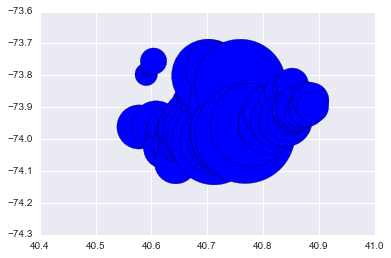

In [47]:
# Quiz 13
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

## Make a scatterplot of data using longitude and latitude
subway_df_loc = subway_df.groupby(['latitude','longitude'], as_index=False).mean()
plt.scatter(subway_df_loc['latitude'],subway_df_loc['longitude'],s=subway_df_loc['ENTRIESn_hourly'])